In [111]:
# libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import plotly.express as px
import matplotlib .pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [65]:
#load the data
df_sales = pd.read_csv('nyc-rolling-sales.csv')

In [66]:
#number of rows and cols
print(df_sales.shape)

#first 5 rows
df_sales.head()

(84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [67]:
df_sales.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [68]:
#drop irrelevant columns - 'Unnamed: 0'
df_sales.drop(columns = ['Unnamed: 0'], inplace=True )

In [69]:
df_sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [70]:
# data types for each column
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

<h2><b>Convert Datatypes</b></h2>

In [71]:
#object columns

print(df_sales.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [72]:
#integer columns

print(df_sales.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [73]:
object_cols = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']

for col in object_cols:
    df_sales[col] = df_sales[col].astype('category')

In [74]:
numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in numeric:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

In [75]:
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])

In [76]:
#check the datatypes again
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  int64   
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  int64   
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [77]:
#removing spaces in names of columns and replaceing it with _
df_sales.columns = df_sales.columns.str.replace(' ', '_')

In [78]:
df_sales.columns = df_sales.columns.str.lower()
df_sales.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [79]:
#new column for age of the property

df_sales ['age'] = 2021 - df_sales ['year_built']

#categorizing building - prewar and post war

df_sales['age_group'] = np.where(df_sales['age']>=76, 'Pre-War', 'Post-War')

#convert to category

df_sales['age_group'] = df_sales['age_group'].astype('category')

df_sales

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,121,Pre-War
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,121,Pre-War
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


In [80]:
#convert numerical values in borough columns to their respective names

df_sales['borough'] = df_sales ['borough'].astype(str)
df_sales['borough'] = df_sales ['borough'].str.replace("1", "Manhattan")
df_sales['borough'] = df_sales ['borough'].str.replace("2", "Bronx")
df_sales['borough'] = df_sales ['borough'].str.replace("3", "Brooklyn")
df_sales['borough'] = df_sales ['borough'].str.replace("4", "Queens")
df_sales['borough'] = df_sales ['borough'].str.replace("5", "Staten Island")


In [81]:
df_sales.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,121,Pre-War
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,121,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War


In [82]:
#check for missing values
df_sales.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
age_group                             0
dtype: int64

In [83]:
#percentage of missing values

df_sales.isnull().sum()/len(df_sales)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
age                                0.000000
age_group                       

In [84]:
#remove rows missing data
df_sales = df_sales.dropna()

In [85]:
#check missing values again

df_sales.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
age_group                         0
dtype: int64

In [86]:
df_sales.describe().apply(lambda s: s.apply('{0:.5f}' .format)).transpose()

,count,mean,std,min,25%,50%,75%,max
block,48244.00000,4984.53219,3427.41809,1.00000,2206.75000,4660.50000,6996.00000,16319.00000
lot,48244.00000,234.32466,496.36152,1.00000,21.00000,45.00000,94.00000,9009.00000
zip_code,48244.00000,10939.68133,1072.75209,0.00000,10469.00000,11217.00000,11237.00000,11694.00000
residential_units,48244.00000,2.56654,17.46548,0.00000,1.00000,1.00000,2.00000,1844.00000
commercial_units,48244.00000,0.24917,10.98807,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,48244.00000,2.83463,20.75042,0.00000,1.00000,1.00000,2.00000,2261.00000
land_square_feet,48244.00000,3358.11655,31435.89670,0.00000,1413.00000,2140.00000,3071.00000,4228300.00000
gross_square_feet,48244.00000,3669.75253,29474.91185,0.00000,828.00000,1620.00000,2520.00000,3750565.00000
year_built,48244.00000,1827.76517,464.36115,0.00000,1920.00000,1931.00000,1961.00000,2017.00000
tax_class_at_time_of_sale,48244.00000,1.47577,0.83359,1.00000,1.00000,1.00000,2.00000,4.00000


In [87]:
#locate where year_built = 0 yrs

df_sales[df_sales['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2021,Pre-War
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2021,Pre-War
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2021,Pre-War
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2021,Pre-War
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2021,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2021,Pre-War
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2021,Pre-War
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2021,Pre-War
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2021,Pre-War


In [88]:
#check how many rows where the year_built < 1

zero = df_sales[df_sales['year_built'] ==0]
count = zero.count()
count

borough                           2911
neighborhood                      2911
building_class_category           2911
tax_class_at_present              2911
block                             2911
lot                               2911
ease-ment                         2911
building_class_at_present         2911
address                           2911
apartment_number                  2911
zip_code                          2911
residential_units                 2911
commercial_units                  2911
total_units                       2911
land_square_feet                  2911
gross_square_feet                 2911
year_built                        2911
tax_class_at_time_of_sale         2911
building_class_at_time_of_sale    2911
sale_price                        2911
sale_date                         2911
age                               2911
age_group                         2911
dtype: int64

In [89]:
#remove all rows where year_built = 0
df_sales = df_sales[df_sales['year_built'] != 0]

In [90]:
#check for outliers in other columns

df_sales [df_sales['land_square_feet'] == 0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


In [91]:
df_sales[df_sales['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


In [92]:
#removing the outliers found above
df_sales = df_sales[df_sales['land_square_feet'] != 0]
df_sales = df_sales[df_sales['gross_square_feet'] !=0]


In [93]:
#check if outliers were removed

df_sales.describe().apply(lambda s: s.apply('{0: .5f}' .format)).transpose()

,count,mean,std,min,25%,50%,75%,max
block,36805.00000,5329.87078,3558.73638,5.00000,2649.00000,4848.00000,7356.00000,16319.00000
lot,36805.00000,60.68800,138.13090,1.00000,19.00000,38.00000,63.00000,9009.00000
zip_code,36805.00000,11010.03953,488.93276,0.00000,10467.00000,11219.00000,11361.00000,11694.00000
residential_units,36805.00000,3.18209,19.82145,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,36805.00000,0.32319,12.57908,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,36805.00000,3.50406,23.60379,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,36805.00000,4197.33422,35778.41850,200.00000,2000.00000,2500.00000,3800.00000,4228300.00000
gross_square_feet,36805.00000,4790.49126,33637.49347,60.00000,1428.00000,2000.00000,2898.00000,3750565.00000
year_built,36805.00000,1939.07811,30.28128,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000
tax_class_at_time_of_sale,36805.00000,1.26681,0.72823,1.00000,1.00000,1.00000,1.00000,4.00000


In [94]:
df_sales.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101,Pre-War
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,101,Pre-War


<AxesSubplot:xlabel='age', ylabel='sale_price'>

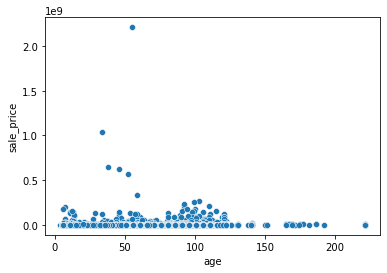

In [95]:
#scatter plot to find more outliers
sns.scatterplot(data =df_sales, x='age', y='sale_price')

In [96]:
#remove more outliers - sale price>$2bn, removing every properties other $200,000,000

df_sales = df_sales[df_sales['sale_price'] <200000000]

<AxesSubplot:xlabel='age', ylabel='sale_price'>

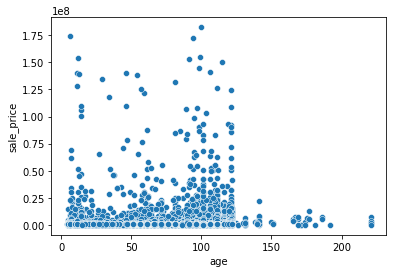

In [97]:
sns.scatterplot(data=df_sales, x='age', y='sale_price')

C:\Users\natac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

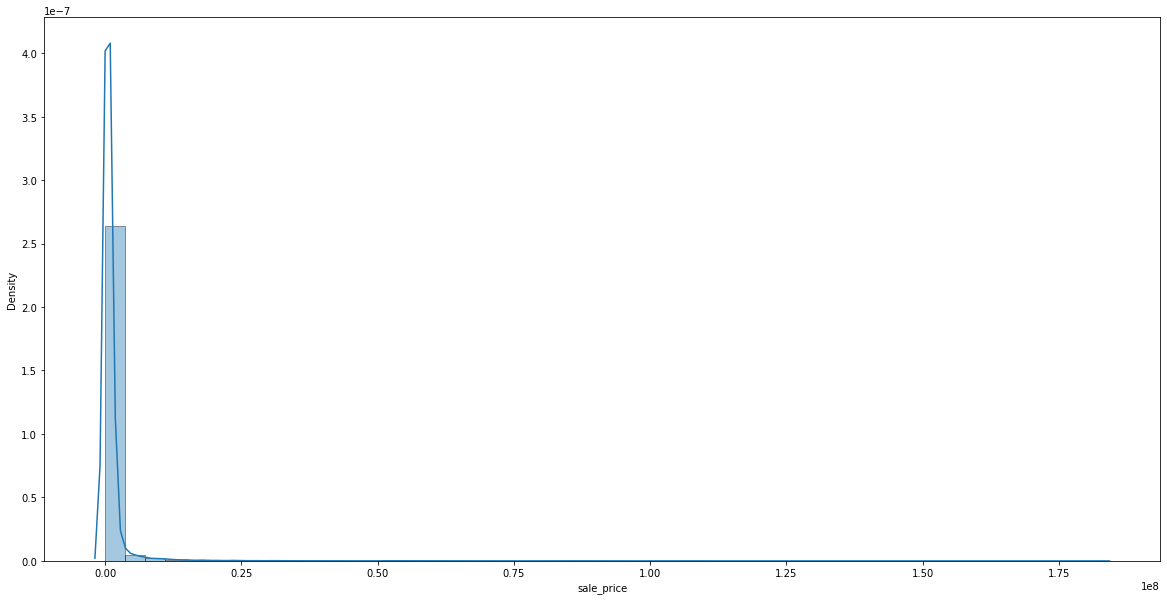

In [98]:
#distribution plot for properties under $200,000,000
plt.figure(figsize=(20,10))
sns.distplot(df_sales['sale_price'], kde =True, hist_kws =dict(edgecolor="k"))

In [99]:
#create new df where sale_price is not 0 and below $2 mil. 
new_df = df_sales[(df_sales['sale_price'] <2000000) & (df_sales['sale_price'] != 0)] 

In [100]:
#check new df created
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
block,26762.00000,5840.78951,3761.24604,5.00000,3109.00000,5193.50000,8081.00000,16319.00000
lot,26762.00000,62.70353,124.50092,1.00000,20.00000,39.00000,65.00000,7501.00000
zip_code,26762.00000,11013.52302,505.27967,0.00000,10465.00000,11223.00000,11377.00000,11694.00000
residential_units,26762.00000,2.06464,13.60274,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,26762.00000,0.17813,13.85271,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,26762.00000,2.24165,19.50071,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,26762.00000,3669.30495,33725.55134,200.00000,2000.00000,2500.00000,3815.75000,4228300.00000
gross_square_feet,26762.00000,2894.95643,26379.63473,120.00000,1329.00000,1782.00000,2400.00000,3750565.00000
year_built,26762.00000,1941.92575,30.22254,1800.00000,1920.00000,1931.00000,1960.00000,2017.00000
tax_class_at_time_of_sale,26762.00000,1.13523,0.53542,1.00000,1.00000,1.00000,1.00000,4.00000


<AxesSubplot:xlabel='land_square_feet', ylabel='sale_price'>

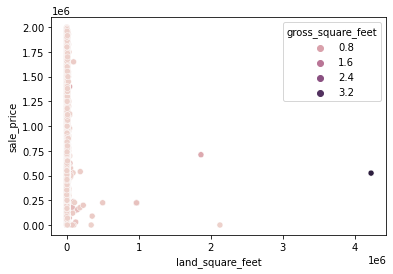

In [101]:
#plots of land_square_feet & gross_square_feet against price to identifty more outliers 
sns.scatterplot(data=new_df, x="land_square_feet", y="sale_price", hue = "gross_square_feet")

In [102]:
#creates a filter for land_square_feet where over 1,000,000 SF
land_filter = (new_df['land_square_feet'] > 1000000)

#creates a filter for land_square_feet where over 1,000,000 SF
gross_filter = (new_df['gross_square_feet'] > 1000000)

In [103]:
#check properties with land_square_feet > 1,000,000 SF
new_df[land_filter]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War
81334,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,1865243.0,683200.0,1975,4,K6,711008.0,2017-03-17,46,Post-War
83181,Staten Island,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,...,1,2128899.0,240.0,1965,4,W1,1.0,2016-11-14,56,Post-War


In [104]:
#check properties with gross_square_feet > 1,000,000 SF
new_df[gross_filter]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War


In [105]:
#removing more potential outliers

new_df = df_sales[(df_sales['sale_price'] <5000000) #remove properties > $5,000,000 
                       & (df_sales['sale_price'] > 1000) #removes all properties less than $1,000
                       & (df_sales['residential_units'] < 500) #limit up to 500 units
                       & (df_sales['commercial_units'] < 500) #limit up to 500 units
                       & (df_sales['land_square_feet'] <df_sales['gross_square_feet']) #removes cases: land sqft is greater than gross sfqt                       & (df_sales['gross_square_feet'] < 2530) #removes instances where gross sf is greater than 2530 SQFT
                       & (df_sales['gross_square_feet'] > 120)] #removes cases: gross sf is less than 120 SQFT

In [106]:
#remove duplicates
new_df.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101,Pre-War
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,,...,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,111,Pre-War
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,,...,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,111,Pre-War
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,,K4,115 AVENUE C,,...,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,122,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84487,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,,A5,61 PEMBROOK LOOP,,...,1,1428.0,2206.0,1992,1,A5,470000.0,2017-05-04,29,Post-War
84488,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,,A5,131 PEMBROOK LOOP,,...,1,1669.0,1828.0,1993,1,A5,425000.0,2017-07-10,28,Post-War
84489,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,,A5,203 PEMBROOK LOOP,,...,1,1360.0,1672.0,1992,1,A5,354000.0,2016-09-12,29,Post-War
84493,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7349,58,,A5,22 QUAIL LANE,,...,1,2000.0,2059.0,1998,1,A5,549000.0,2017-05-11,23,Post-War


<h1> Average Sales Price by Borough</h1>

In [107]:
#create list of average_sale_price

borough = new_df['borough'].to_list()

avg_sales_prices = []

for i in borough:
    avg_p = np.mean(new_df.sale_price[new_df.borough == i])
    avg_sales_prices.append(avg_p)

Text(0.5, 1.0, 'Average Sales Price by Borough')

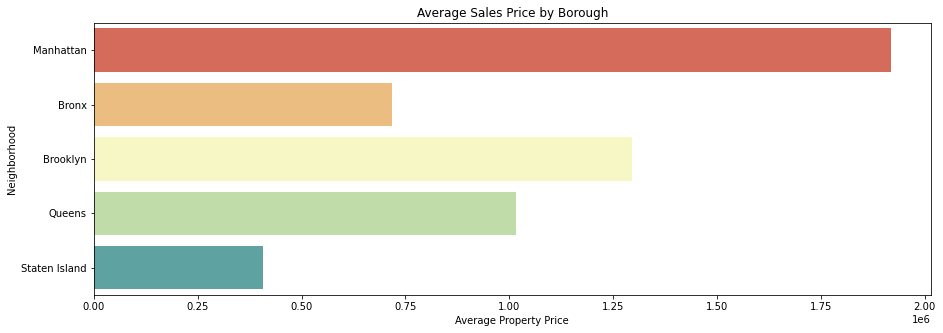

In [108]:
#plot average sales prices by borough 

plt.figure(figsize=(15,5))

ax=sns.barplot(x=avg_sales_prices, y=borough, ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Sales Price by Borough')

In [51]:
new_df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_group
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101,Pre-War
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,,...,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,111,Pre-War
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,,...,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,111,Pre-War
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,,K4,115 AVENUE C,,...,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,122,Pre-War


<h1> Sales Price vs Year Built</h1>

Text(0.5, 1.0, 'Age vs Sale Price')

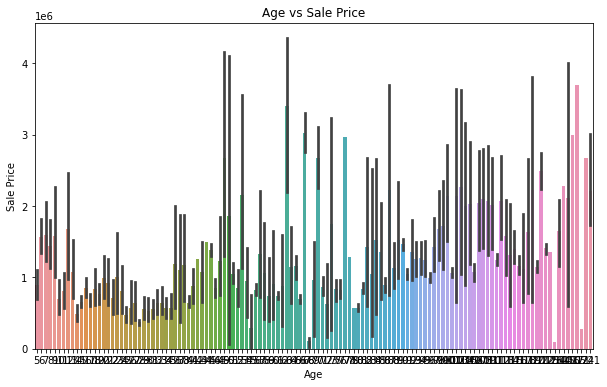

In [55]:
plt.figure(figsize=(10,6) )

ax = sns.barplot (x='age', y='sale_price', data=new_df)
ax.set_xlabel('Age')
ax.set_ylabel('Sale Price')
plt.title('Age vs Sale Price')

#fix frequency on x label

<h1> Average Square feet price by Borough </h1>

In [ ]:
#create list of average_sale_price

borough = new_df['borough'].to_list()

#create new column price per sqft


avg_sqft_prices = []

#for i in borough:
   #avg_p = np.mean(new_df.sale_price[new_df.borough == i])
    #avg_sales_prices.append(avg_p)

<h1>Feature Correlation</h1>

Text(0.5, 1.0, 'Feature Correlation')

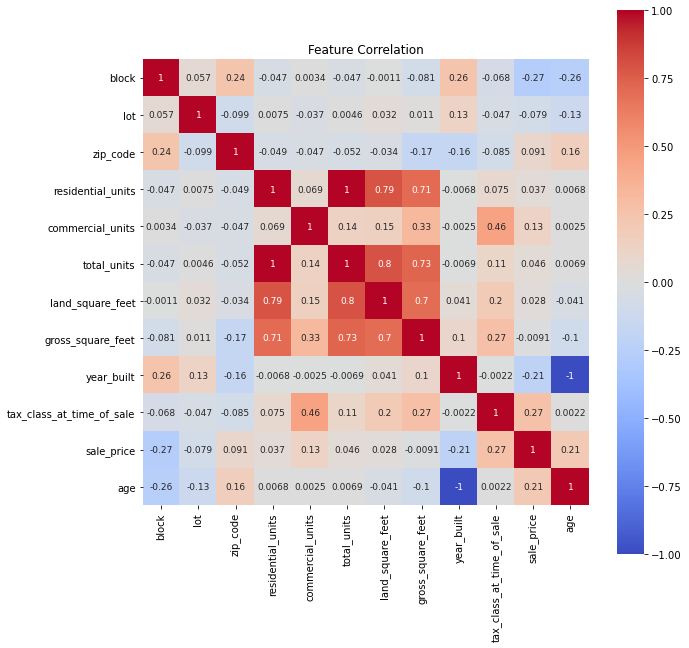

In [58]:
corrft = new_df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrft, cmap= 'coolwarm', square=True, annot=True, annot_kws={"size":9})
plt.title('Feature Correlation')

In [44]:
#check new df again
new_df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
block,7607.00000,3948.23229,2825.31392,5.00000,1749.00000,3412.00000,5515.00000,16239.00000
lot,7607.00000,54.36848,115.89114,1.00000,19.00000,37.00000,62.00000,7501.00000
zip_code,7607.00000,11013.72709,421.00236,10001.00000,10472.00000,11215.00000,11233.00000,11694.00000
residential_units,7607.00000,3.67306,13.57543,0.00000,2.00000,2.00000,3.00000,462.00000
commercial_units,7607.00000,0.26620,1.01215,0.00000,0.00000,0.00000,0.00000,35.00000
total_units,7607.00000,3.93835,13.68285,0.00000,2.00000,2.00000,3.00000,462.00000
land_square_feet,7607.00000,2396.57197,4046.48506,200.00000,1700.00000,2000.00000,2500.00000,152000.00000
gross_square_feet,7607.00000,5269.85526,19276.36820,700.00000,2232.00000,2870.00000,3600.00000,600613.00000
year_built,7607.00000,1936.95307,35.31782,1800.00000,1910.00000,1930.00000,1960.00000,2016.00000
tax_class_at_time_of_sale,7607.00000,1.37965,0.76228,1.00000,1.00000,1.00000,2.00000,4.00000


C:\Users\natac\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

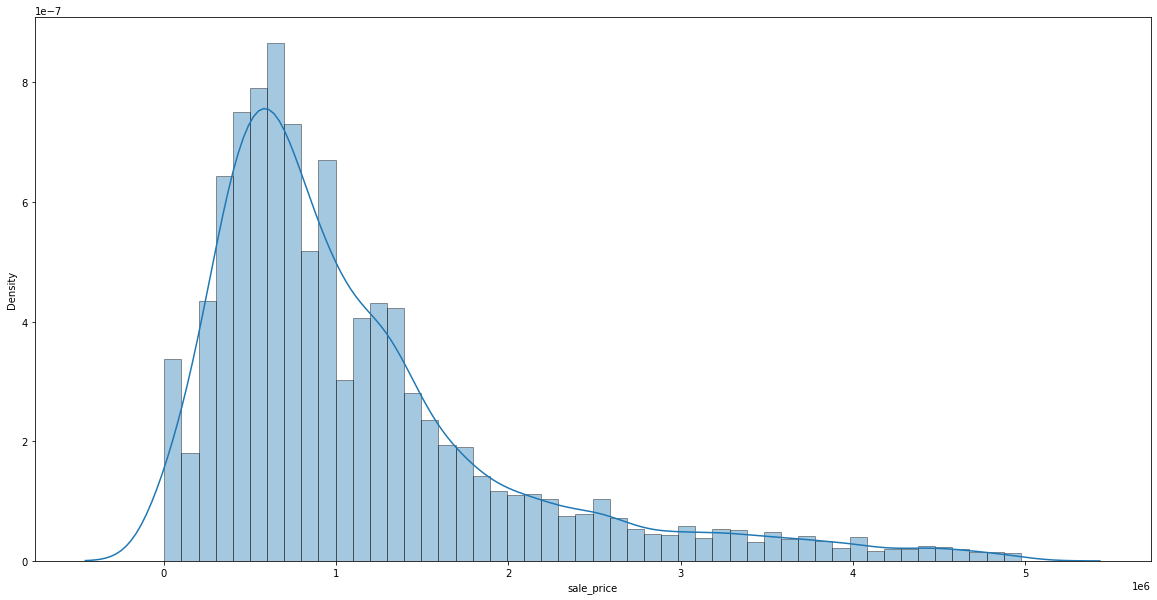

In [45]:
#create distribution plot of property sale prices
plt.figure(figsize = (20,10))
sns.distplot(new_df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))